# Projet Capstone de Data Science

        Présentation

Si vous envisagez de sortir voir un film, dans quelle mesure pouvez-vous faire confiance aux critiques et aux évaluations en ligne ?
Surtout si l'entreprise affichant la note gagne aussi de l'argent en vendant des billets de cinéma.
Est-ce que l'entreprise a tendance à sur-évaluer les films avec de meilleures notes que celles qu'ils devraient obtenir ?

    Objectif :

Vous devrez utiliser vos compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure évaluation/notation des films dans le but de vendre plus de billets.

    Les données

Ce sont les données derrière l'histoire de l'article Be Suspicious Of Online Movie Ratings, en particulier Fandango disponible publiquement sur : https://github.com/fivethirtyeight/data.

Il existe deux fichiers csv, l'un avec les Stars (étoiles) et les Ratings (notes) affichés sur Fandango, et l'autre avec des données agrégées pour les notations/évaluations de films d'autres sites, tels que Metacritic, IMDB et Rotten Tomatoes.

all_sites_scores.csv
all_sites_scores.csv contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

fandango_scape.csv
fandango_scrape.csv contient tous les films de l'article 538 tirés de Fandango.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df est ici fandango_scrape.csv
df=pd.read_csv("F:/dataanalytics/données projet/raw.githubusercontent.com_moncoachdata_MasterClass_DS_ML_main_fandango_scrape.csv")
df

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [4]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

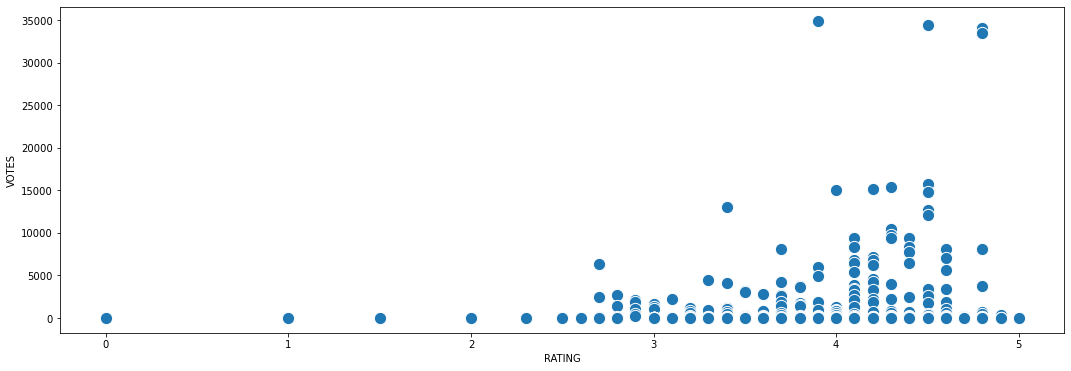

In [6]:
#Scatterplot pour les nuages de points
plt.figure(figsize=(18,6))
sns.scatterplot(x="RATING",y="VOTES",data=df,s=150)

In [7]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [8]:
df["YEAR"]=df["FILM"].apply(lambda year:year.split()[-1]) #ou df['FILM'].apply(lambda title:title.split('(')[-1])
df["YEAR"]

0      (2015)
1      (2015)
2      (2015)
3      (2015)
4      (2015)
        ...  
499    (2015)
500    (2015)
501    (2015)
502    (1964)
503    (2012)
Name: YEAR, Length: 504, dtype: object

In [9]:
df["YEAR"].value_counts()

(2015)    478
(2014)     23
(2016)      1
(1964)      1
(2012)      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

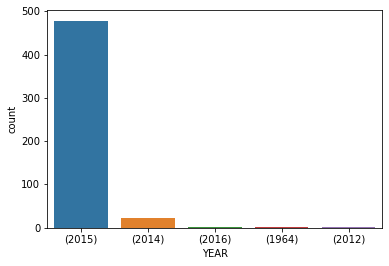

In [10]:
sns.countplot(x="YEAR",data=df)

In [11]:
df.sort_values("VOTES",ascending=False).head(10)  #ou df.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,(2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,(2015)
7,Minions (2015),4.0,4.0,14998,(2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,(2015)
9,Into the Woods (2014),3.5,3.4,13055,(2014)


In [12]:
FILM_No_Vote=df["VOTES"]==0
FILM_No_Vote.sum()

69

In [13]:
# Il s'agit des films obtenant des votes positifs
FILM_Evaluated=df["VOTES"]>0
df[FILM_Evaluated]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015)
1,Jurassic World (2015),4.5,4.5,34390,(2015)
2,American Sniper (2015),5.0,4.8,34085,(2015)
3,Furious 7 (2015),5.0,4.8,33538,(2015)
4,Inside Out (2015),4.5,4.5,15749,(2015)
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,(2015)
431,The Intern (2015),5.0,5.0,1,(2015)
432,The Park Bench (2015),5.0,5.0,1,(2015)
433,The Wanted 18 (2015),5.0,5.0,1,(2015)


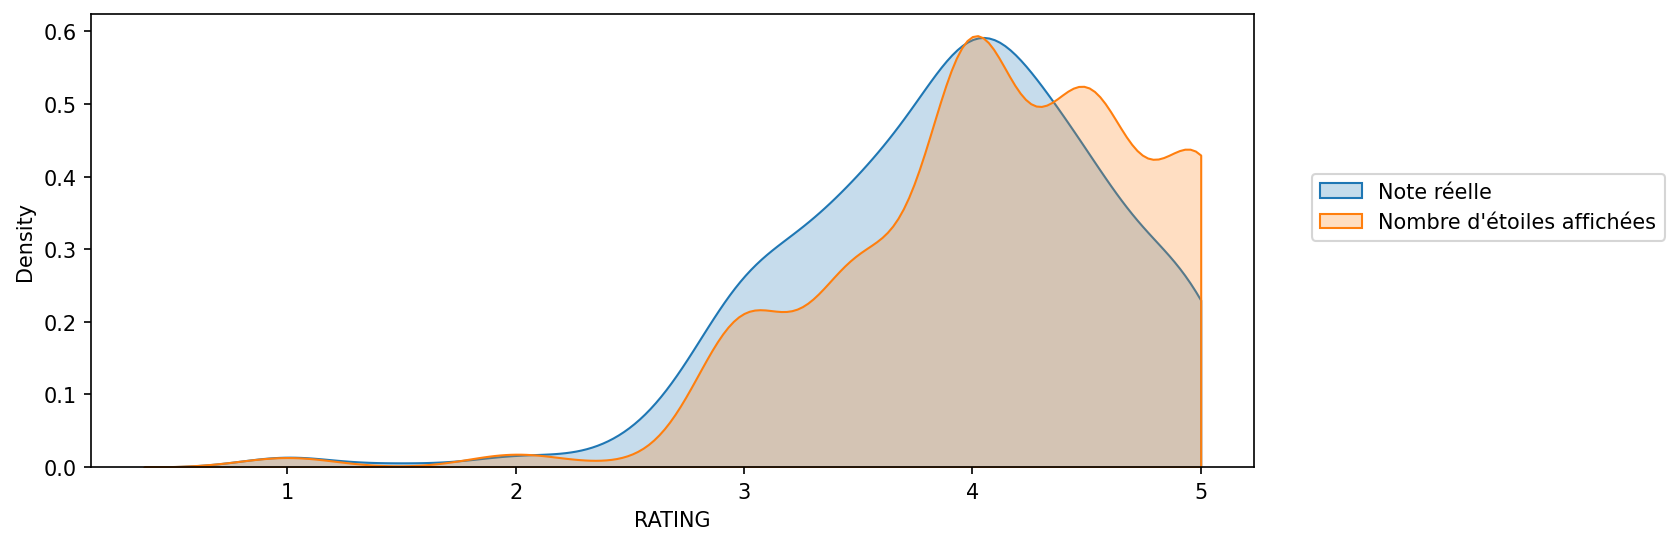

In [14]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=df[FILM_Evaluated],x='RATING',clip=[0,5],fill=True,label="Note réelle")
sns.kdeplot(data=df[FILM_Evaluated],x='STARS',clip=[0,5],fill=True,label="Nombre d'étoiles affichées")

plt.legend(loc=(1.05,0.5))

In [15]:
df["STARS_DIF"]=round(df["STARS"]-df["RATING"],1)
df["STARS_DIF"]

0      0.1
1      0.0
2      0.2
3      0.2
4      0.0
      ... 
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
Name: STARS_DIF, Length: 504, dtype: float64

In [16]:
df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,(2015),0.0
2,American Sniper (2015),5.0,4.8,34085,(2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,(2015),0.2
4,Inside Out (2015),4.5,4.5,15749,(2015),0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,(2015),0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,(2015),0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,(2015),0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,(1964),0.0


<AxesSubplot:xlabel='STARS_DIF', ylabel='count'>

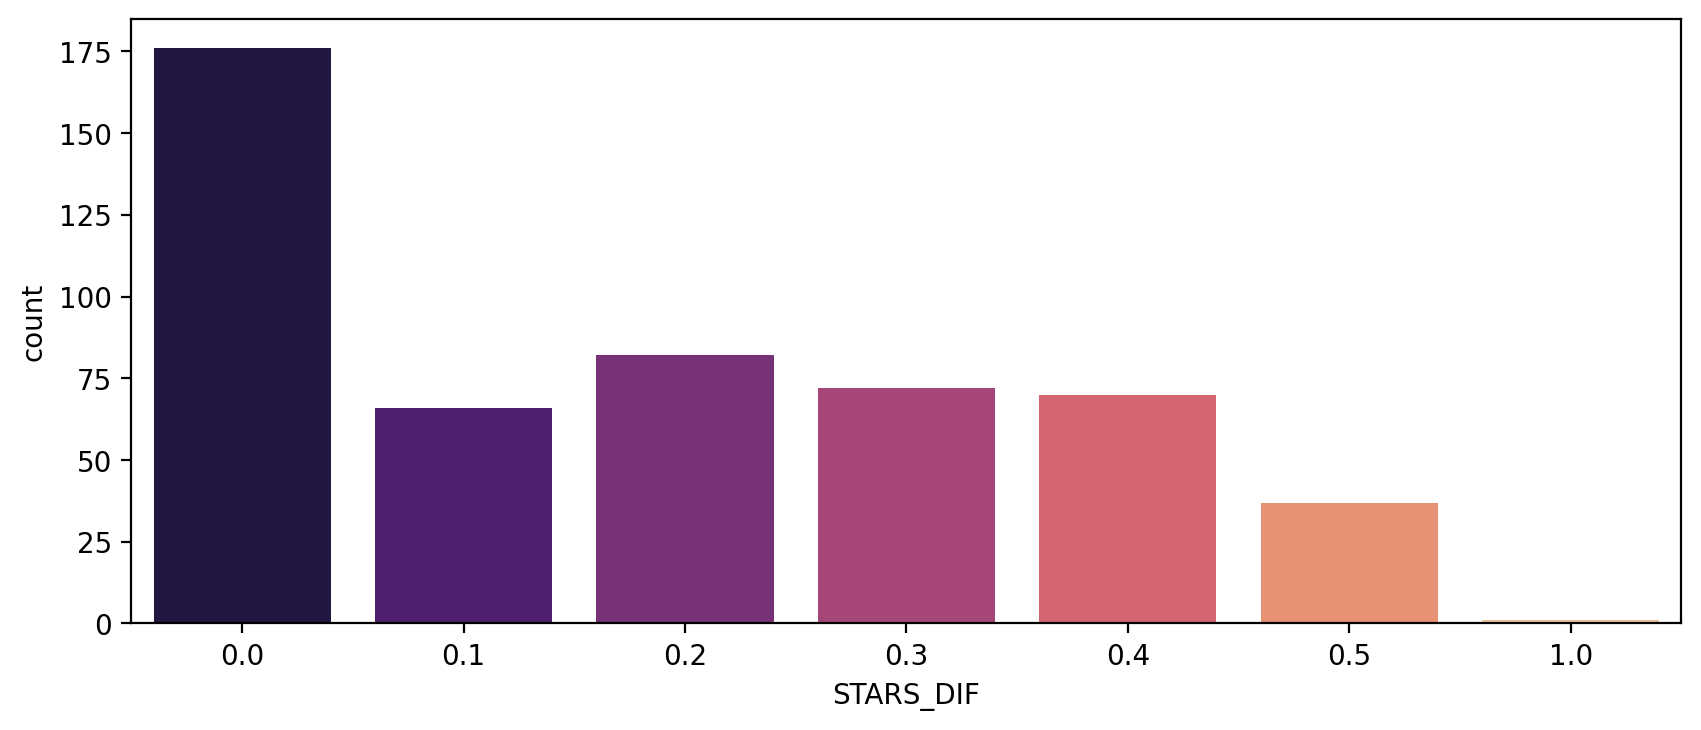

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x="STARS_DIF",data=df, palette='magma')

In [19]:
# Un film affichait une différence d'une étoile: donc ==1
df["STARS_DIF"]==1
df[df["STARS_DIF"]==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF
381,Turbo Kid (2015),5.0,4.0,2,(2015),1.0


# Comparaison des évaluations de Fandango avec d'autres plateformes

In [20]:
#Lecture du fichier "all_sites_scores.csv" 
# Soit df2
df2=pd.read_csv("F:/dataanalytics/données projet/raw.githubusercontent.com_moncoachdata_MasterClass_DS_ML_main_all_sites_scores.csv")
df2


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [23]:
df2.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


    Rotten Tomatoes

Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs.

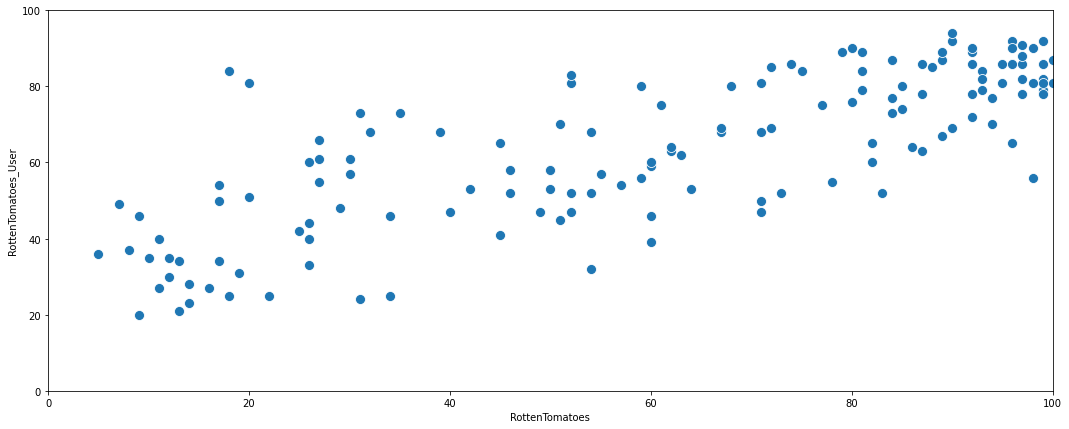

In [24]:
plt.figure(figsize=(18,7))
sns.scatterplot(x="RottenTomatoes",y="RottenTomatoes_User",data=df2,s=100)
#repère 0 à 100 pour x et y
plt.xlim(0,100)
plt.ylim(0,100);

In [25]:
df2["Rotten_Diff"]=df2["RottenTomatoes"]-df2["RottenTomatoes_User"]
df2["Rotten_Diff"]

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [27]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [28]:
 #valeur absolue .abs()
df2["Rotten_Diff_absolue"]=df2["Rotten_Diff"].abs()

In [29]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_absolue
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [30]:
#moyenne .mean()
df2["Rotten_Diff"].abs().mean()  #ou apply(abs).mean()

15.095890410958905

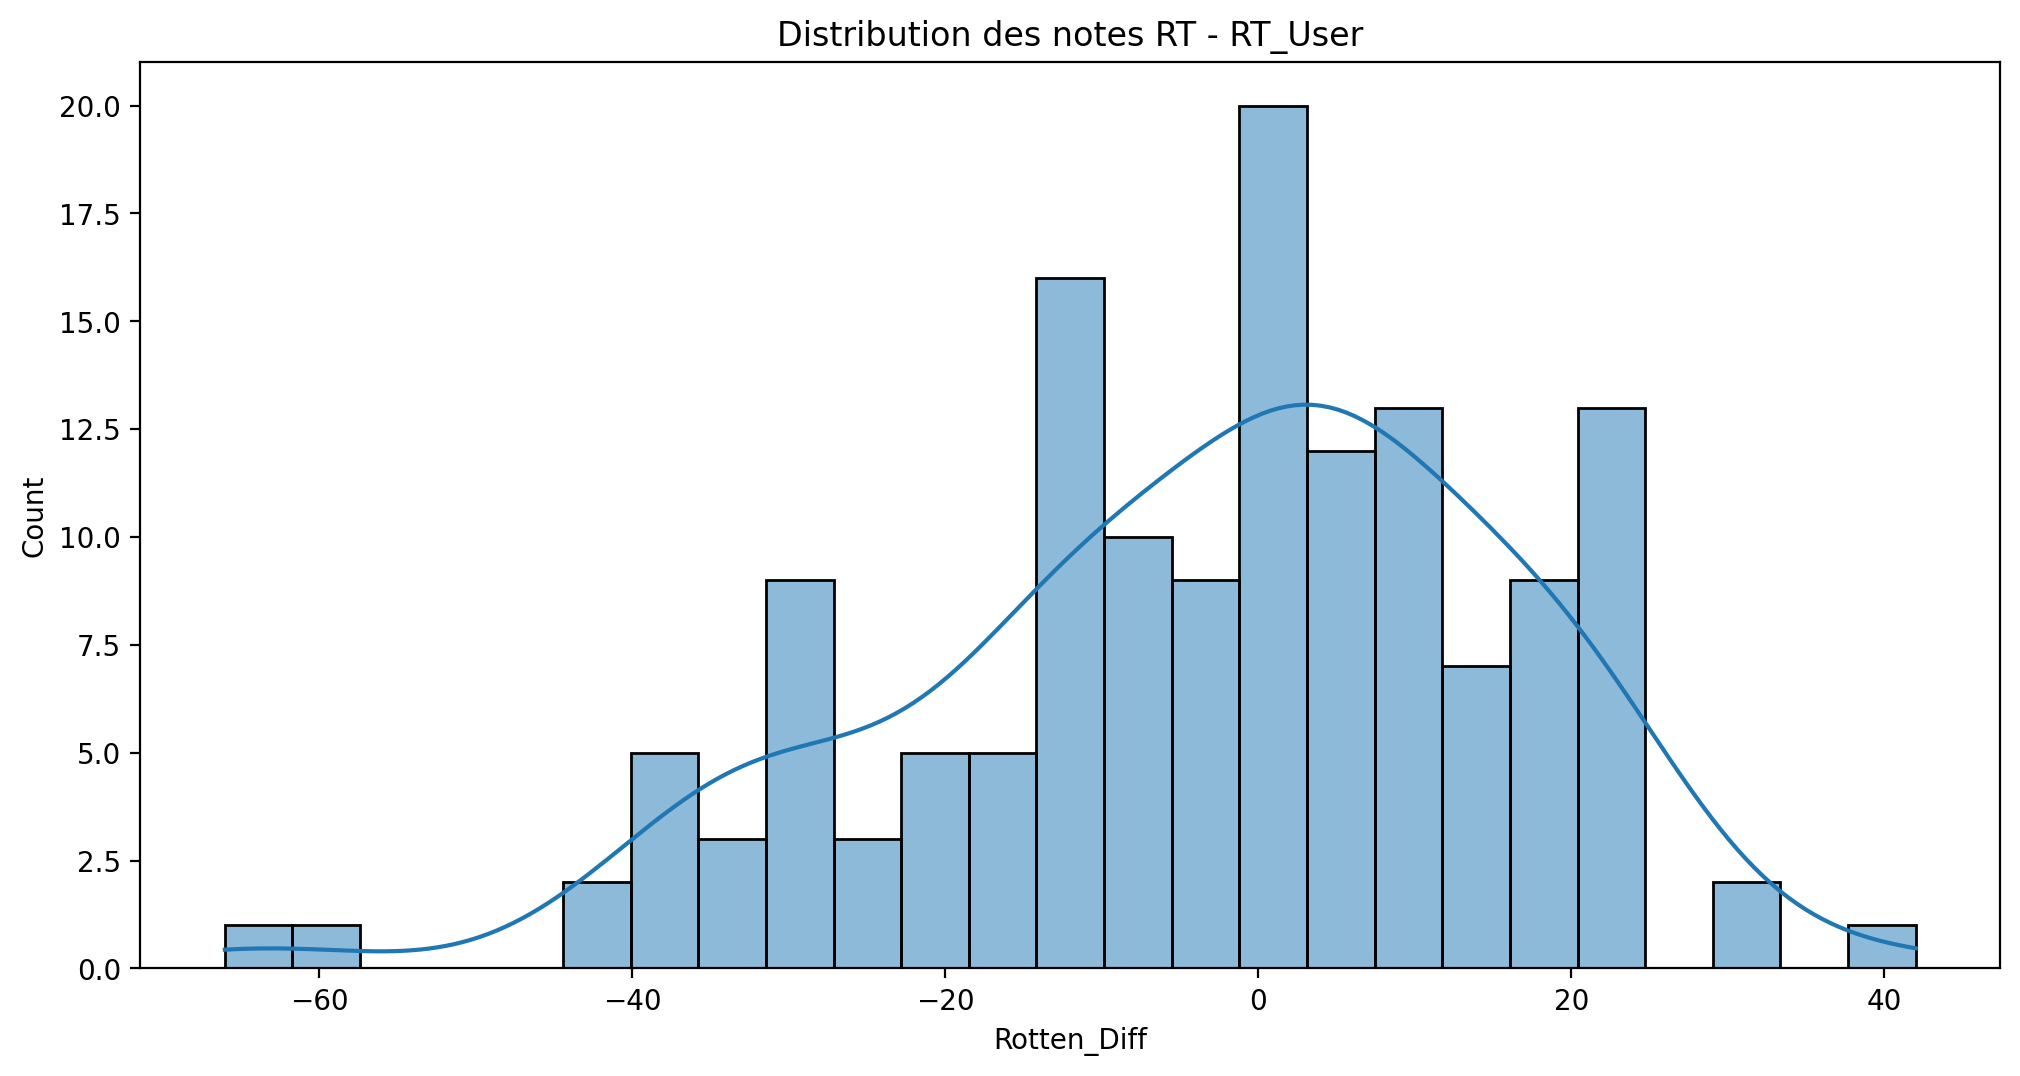

In [31]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x="Rotten_Diff",data=df2,kde=True,bins=25)
plt.title("Distribution des notes RT - RT_User");

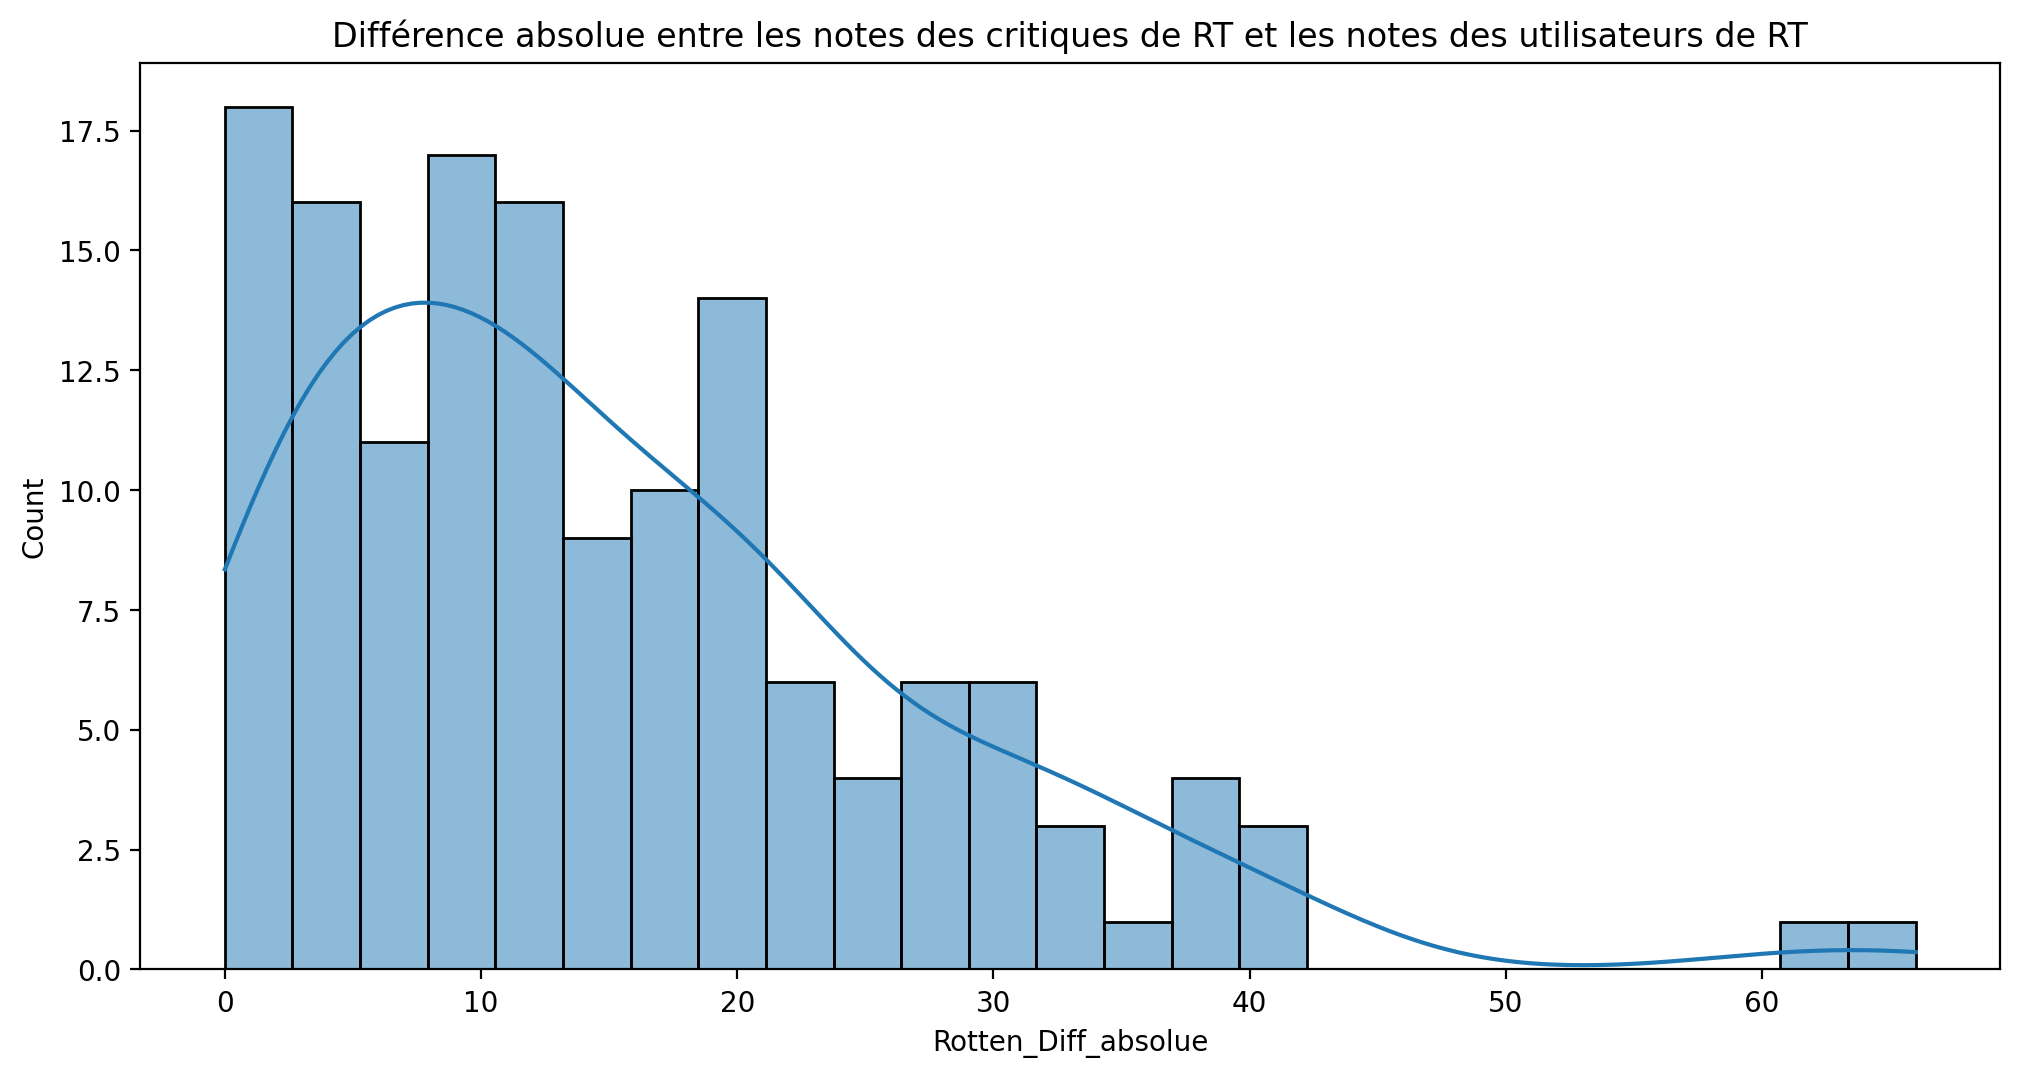

In [32]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(x="Rotten_Diff_absolue",data=df2,kde=True,bins=25)
             #ou x=  .apply(abs).mean()
plt.title("Différence absolue entre les notes des critiques de RT et les notes des utilisateurs de RT");

In [33]:
df2.sort_values("Rotten_Diff",ascending=True)[["FILM","Rotten_Diff"]].head(5) 
#ou df2.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [34]:
df2.sort_values("Rotten_Diff",ascending=False)[["FILM","Rotten_Diff"]].head(5)  
#ou df2.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


    MetaCritic

Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.


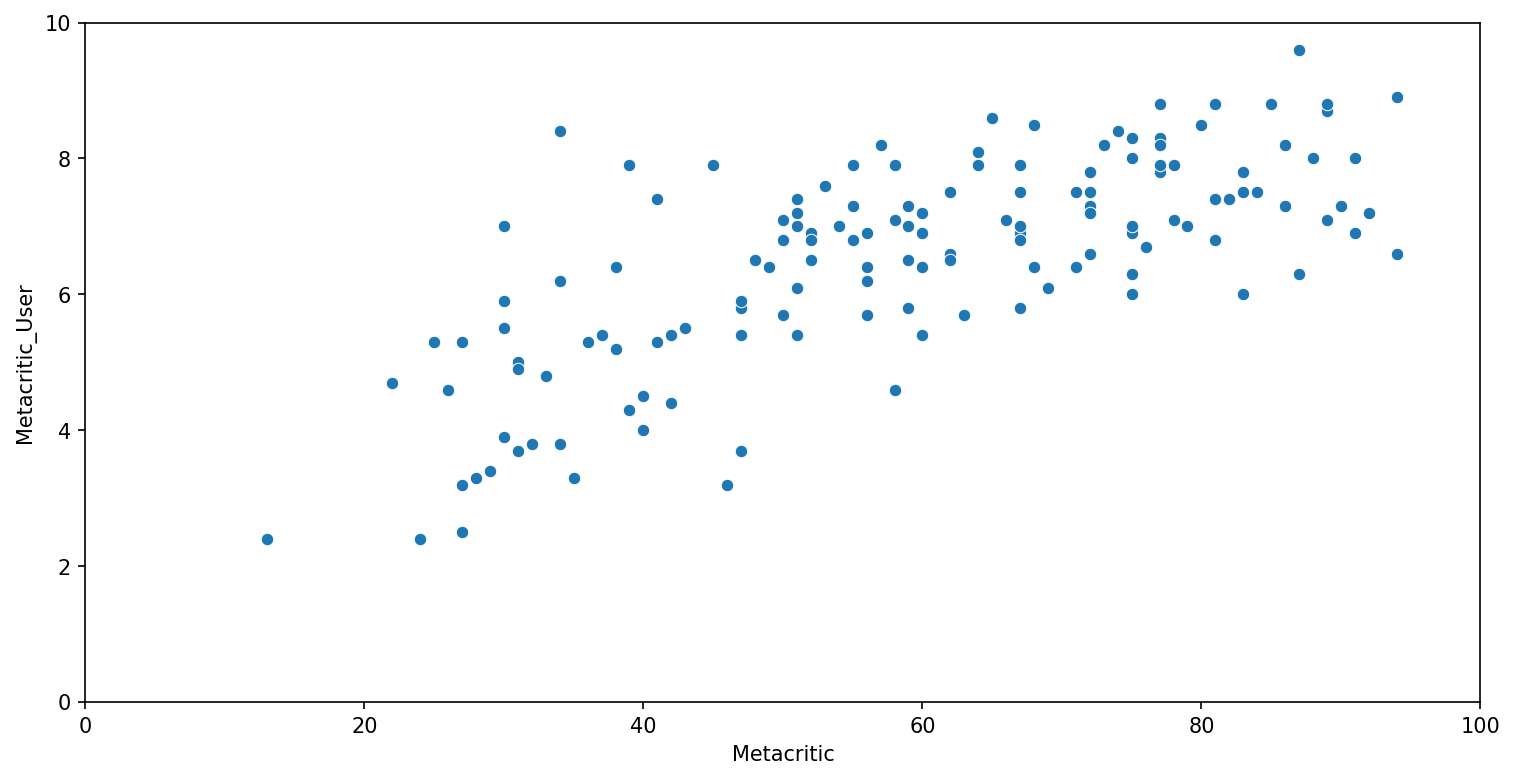

In [36]:
plt.figure(figsize=(12,6),dpi=150)
sns.scatterplot(x="Metacritic",y="Metacritic_User",data=df2)
#Repère 0 à 100 pour x et 0 à 10 pour y
plt.xlim(0,100)
plt.ylim(0,10);

    IMDb
Explorons IMDb. Notez que Metacritic et IMDb offrent le nombre de votes. Analysons les films les plus populaires.


<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

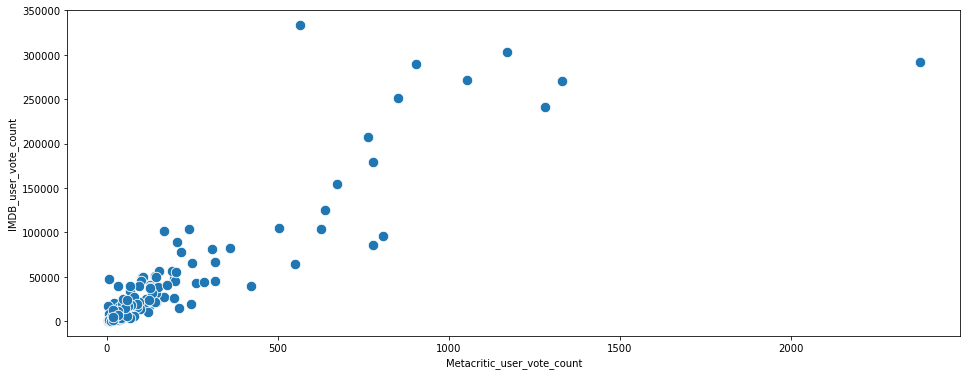

In [37]:
plt.figure(figsize=(16,6))
sns.scatterplot(x="Metacritic_user_vote_count",y="IMDB_user_vote_count",data=df2,s=110)

In [38]:
df2.sort_values("IMDB_user_vote_count",ascending=False).head(1) 
#ou df2.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_absolue
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [39]:
df2.sort_values("Metacritic_user_vote_count",ascending=False).head(1)
#ou df2.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_absolue
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


# Notes Fandago vs. Autres Plateformes

Examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

In [40]:
#FUSION INNER pd.merge()
df3=pd.merge(df,df2,on='FILM', how='inner') 
df3

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_absolue
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,(2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,(2015),0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,(2015),0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,(2015),0.0,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,(2015),0.0,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,(2015),0.4,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,(2015),0.3,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,(2015),0.1,95,86,86,7.3,7.4,14,696,9,9


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIF                   145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [49]:
#On supprime les colonnes "STARS_DIF" et "Rotten_Diff_absolue"
df3=df3.drop(["STARS_DIF","Rotten_Diff_absolue"],axis=1)

In [50]:
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,(2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,(2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,(2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,(2015),98,90,94,8.9,8.6,807,96252,8


    Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5

In [51]:
df3["RT_norm"]=round(df3["RottenTomatoes"]/20,1)
df3["RTU_norm"]=round(df3["RottenTomatoes_User"]/20,1)
df3["Meta_norm"]=round(df3["Metacritic"]/20,1)
df3["Meta_U_norm"]=round(df3["Metacritic_User"]/2,1)
df3["IMDB_norm"]=round(df3["IMDB"]/2,1)

In [52]:
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,(2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,(2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,(2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,(2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,(2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [54]:
norm_scores=df3[["STARS","RATING","RT_norm","RTU_norm","Meta_norm","Meta_U_norm","IMDB_norm"]]
norm_scores.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


    Comparaison de la distribution des notes entre les sites

Maintenant, c'est le moment de vérité ! Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?

In [55]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

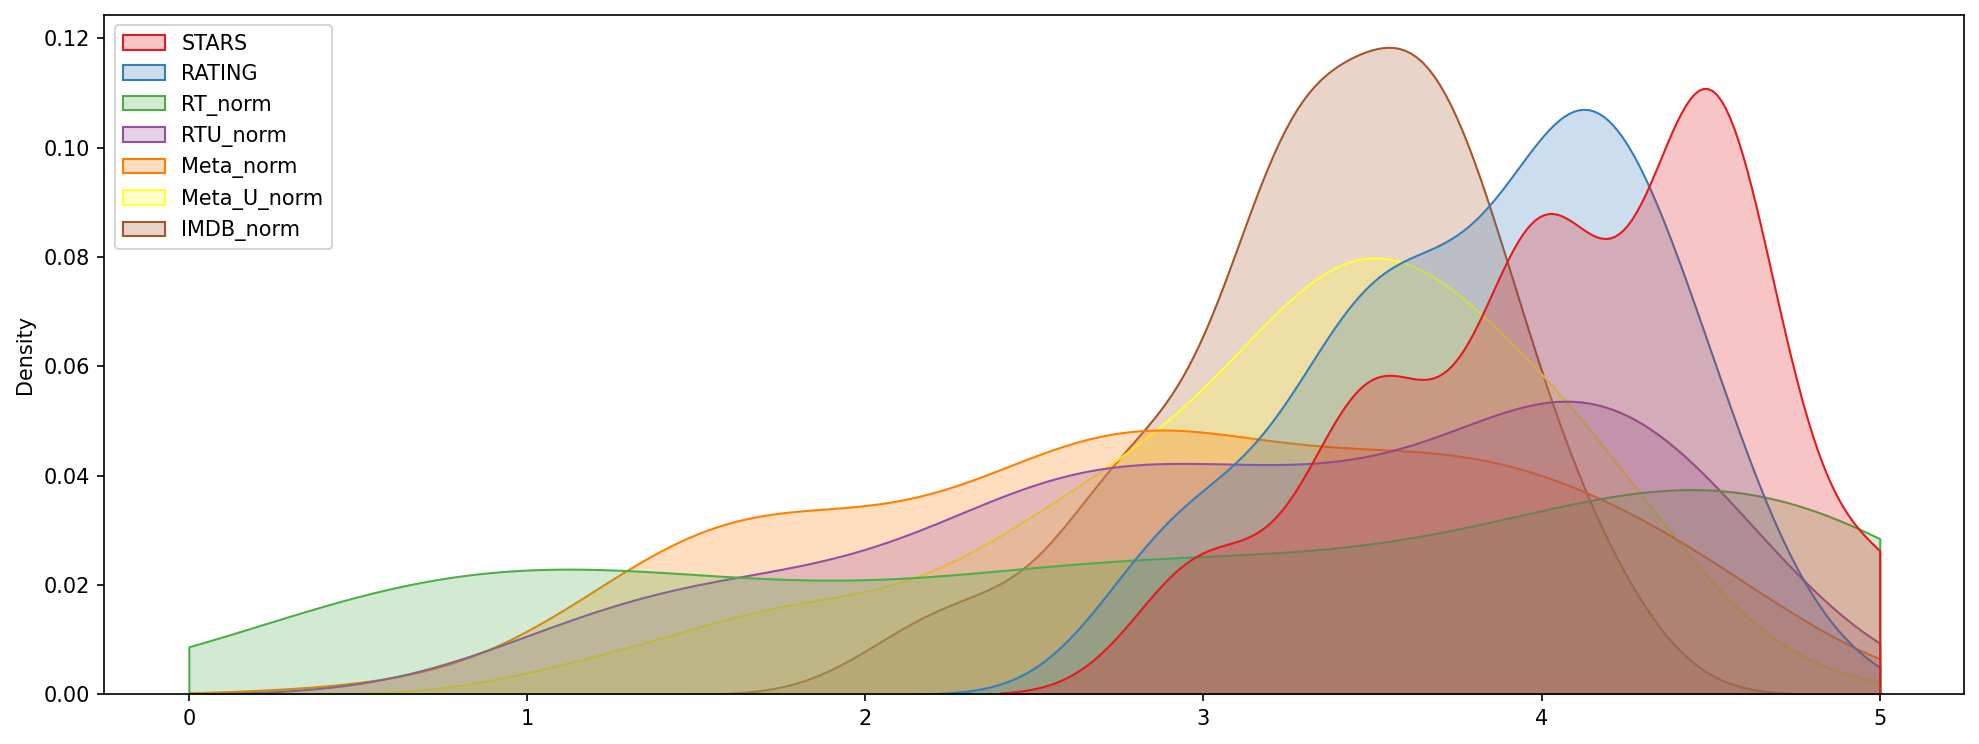

In [56]:
fig, ax = plt.subplots(figsize=(16,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

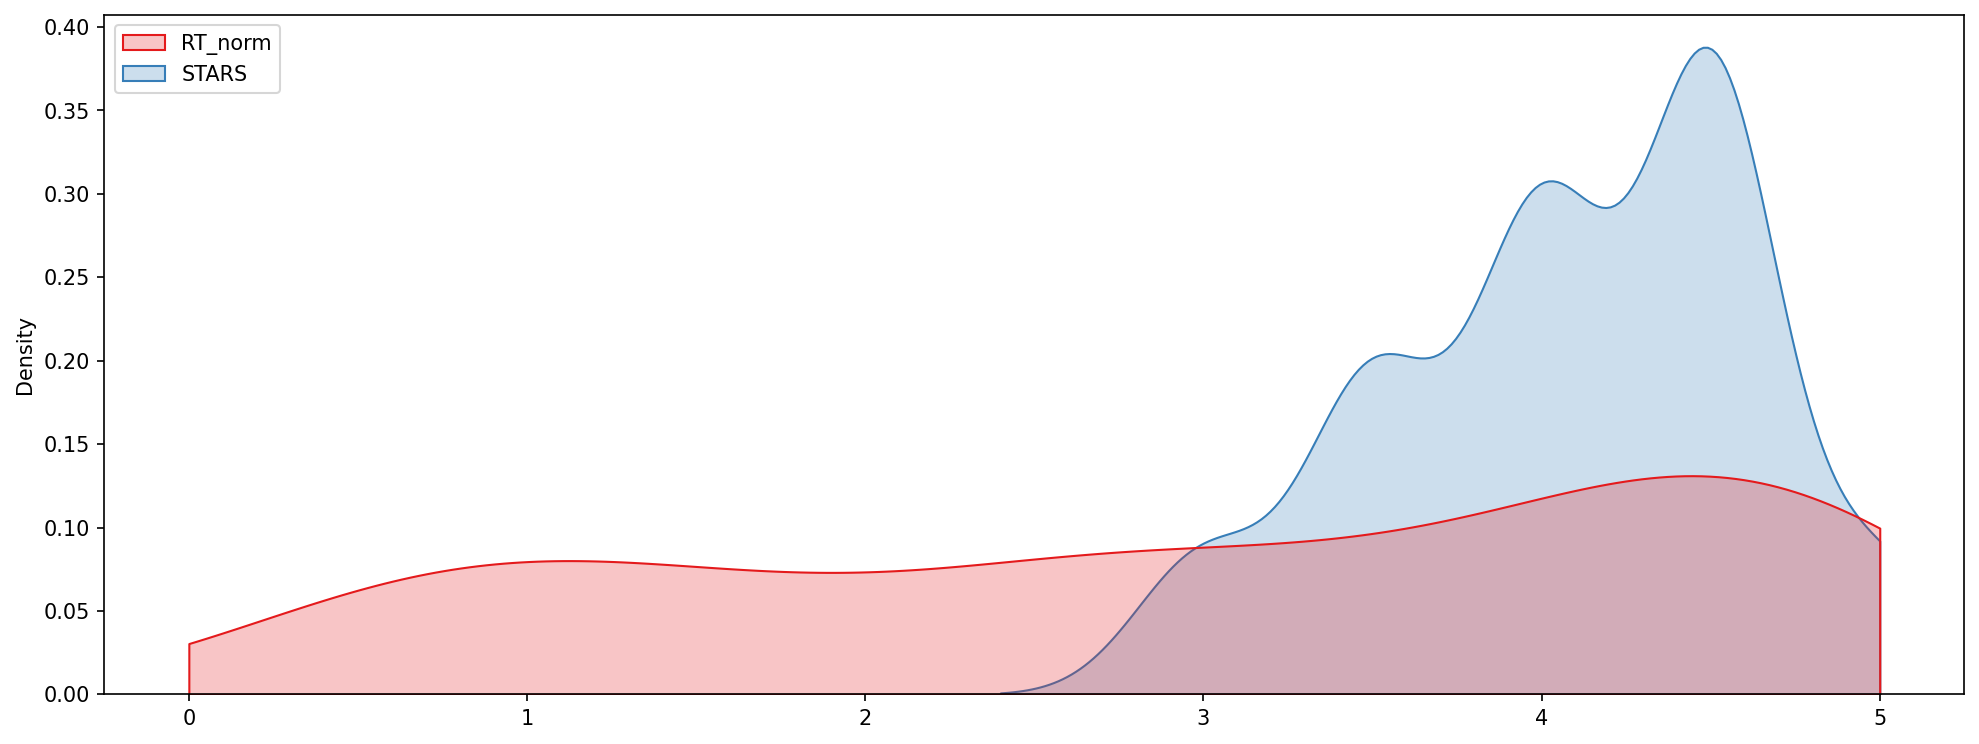

In [58]:
fig, ax = plt.subplots(figsize=(16,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

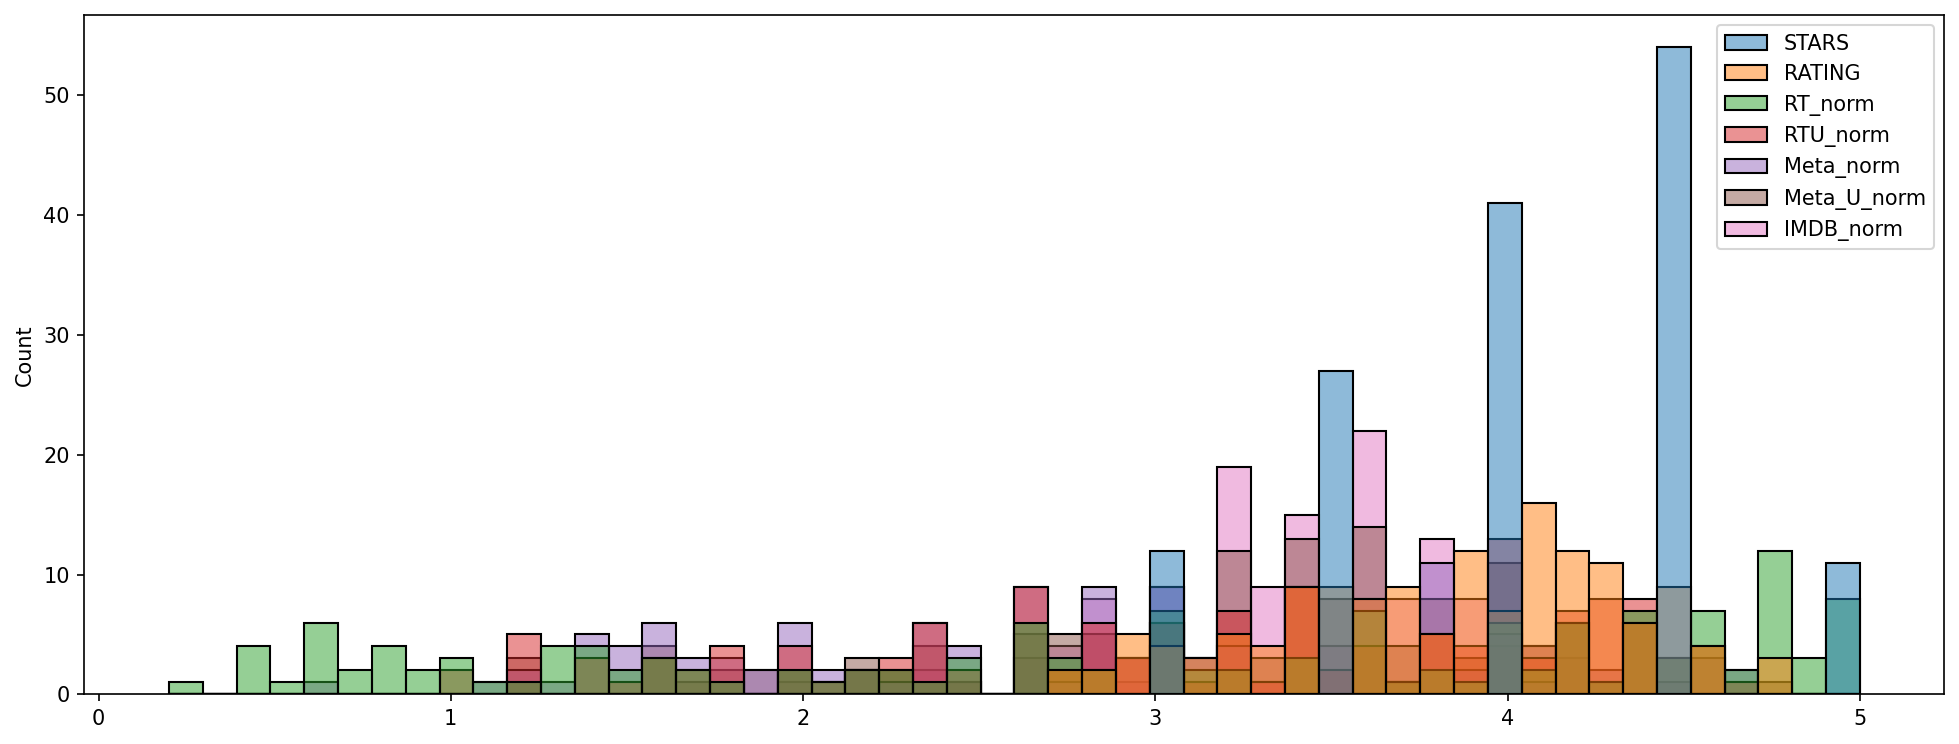

In [59]:
plt.subplots(figsize=(16,6),dpi=150)
sns.histplot(norm_scores,bins=50);

    Comment sont évalués les pires films sur toutes les plateformes ?

Créez une visualisation de clustermap de toutes les notes normalisées. Notez les différences de notation, les films les mieux notés doivent être regroupés par rapport aux films mal notés.

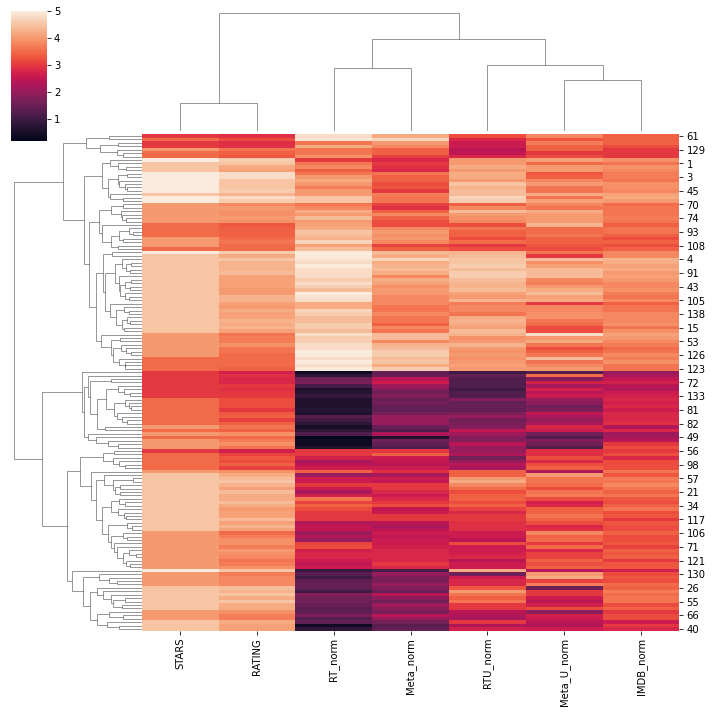

In [60]:
sns.clustermap(norm_scores)

In [62]:
FILM_norm_scores=df3[["STARS","RATING","RT_norm","RTU_norm","Meta_norm","Meta_U_norm","IMDB_norm","FILM"]]
FILM_norm_scores.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [63]:
FILM_norm_scores.sort_values("RT_norm",ascending=True).head(10)
#ou FILM_norm_scores.nsmallest(10,'RT_norm')

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,Meta_U_norm,IMDB_norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


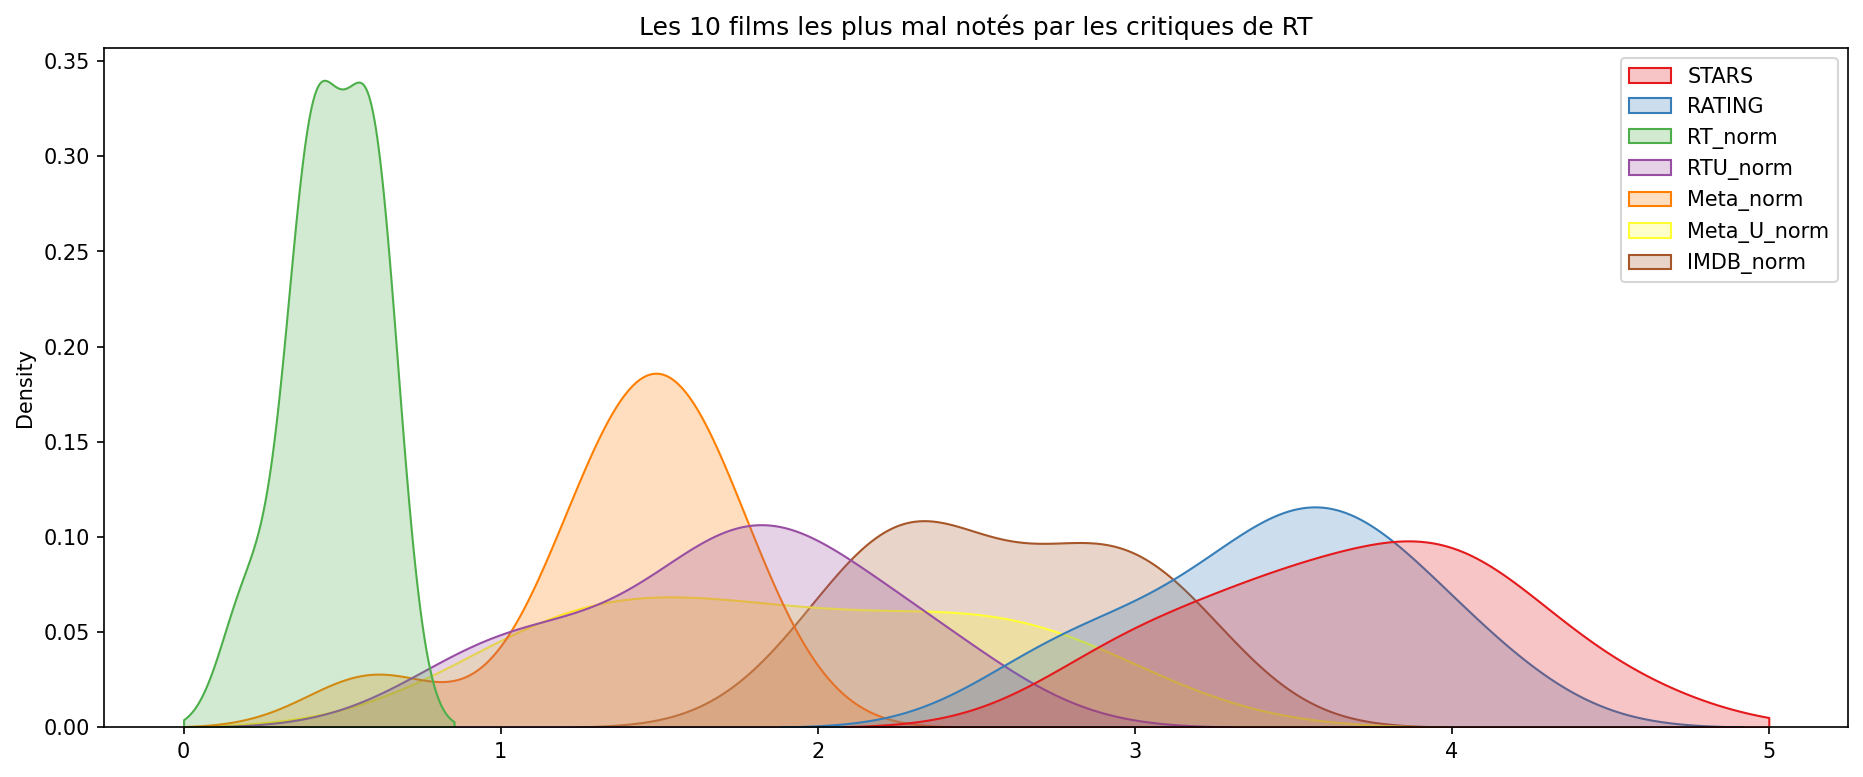

In [64]:
plt.figure(figsize=(15,6),dpi=150)
df4 = FILM_norm_scores.sort_values("RT_norm",ascending=True).head(10).drop('FILM',axis=1)
sns.kdeplot(data=df4,clip=[0,5],shade=True,palette='Set1')
plt.title("Les 10 films les plus mal notés par les critiques de RT");

In [65]:
FILM_norm_scores.iloc[25]

STARS                     4.5
RATING                    4.1
RT_norm                   0.4
RTU_norm                  2.3
Meta_norm                 1.3
Meta_U_norm               2.3
IMDB_norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [66]:
0.4+2.3+1.3+2.3+3.0

9.3

In [67]:
9.3/5

1.86